Amac siniflandirma problemi icin bagimli ve bagimsiz degiskenler arasindaki iliskiyi tanimlayan dogrusal bir model kurmaktir

In [3]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
import warnings
warnings.filterwarnings("ignore",category = DeprecationWarning)
warnings.filterwarnings("ignore",category = FutureWarning)

## Şeker Hastalığı

In [8]:
df = pd.read_csv("diabetes.csv")

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [16]:
y = df["Outcome"]
X = df.drop(["Outcome"],axis=1)

In [20]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [22]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [26]:
loj_model = LogisticRegression(solver = "liblinear").fit(X,y)

In [28]:
loj_model.intercept_

array([-5.89259305])

In [30]:
loj_model.coef_

array([[ 1.17063105e-01,  2.83900559e-02, -1.68885610e-02,
         7.55610273e-04, -6.42909682e-04,  5.97773691e-02,
         6.77434300e-01,  7.24185810e-03]])

In [32]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [34]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [36]:
y_pred = loj_model.predict(X)

In [38]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]])

In [40]:
accuracy_score(y,y_pred)

0.7747395833333334

In [44]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [46]:
loj_model.predict_proba(X)[0:10]

array([[0.35038493, 0.64961507],
       [0.91703695, 0.08296305],
       [0.22474734, 0.77525266],
       [0.9214027 , 0.0785973 ],
       [0.16727068, 0.83272932],
       [0.79900126, 0.20099874],
       [0.88020928, 0.11979072],
       [0.27811611, 0.72188389],
       [0.32057289, 0.67942711],
       [0.92275688, 0.07724312]])

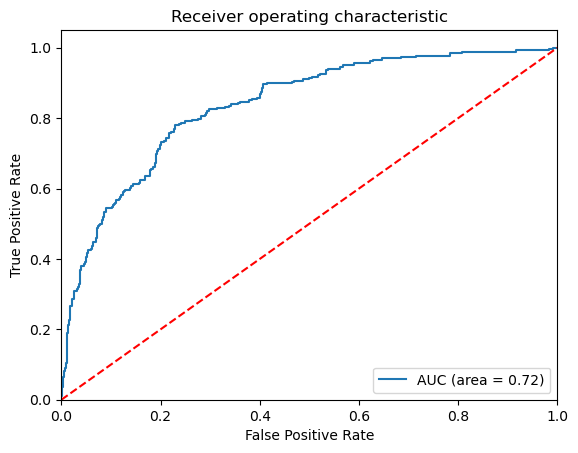

In [48]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1]) #loj_model.predict_proba(X): Modelin her bir sınıf için olasılık tahminlerini döndürür. Genellikle iki sütunlu bir matris olur (biri negatif, diğeri pozitif sınıf için olasılıklar) burada sadece pozitif olani seciyoruz
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
#ROC egrisi olusturur ve bu eğrinin altında kalan alanı (AUC - Area Under the Curve) hesaplar.
#

Eğri sol üst köşeye ne kadar yakınsa, model o kadar iyidir. Bu, modelin yüksek bir Doğru Pozitif Oranı (TPR) elde ederken düşük bir Yanlış Pozitif Oranı (FPR) sağladığı anlamına geli

0.5 < AUC < 1: Modelin ayırt etme yeteneği var. Değer 1'e yaklaştıkça performans artar. Genel olarak:
0.90 - 1.00: Mükemmel
0.80 - 0.90: Çok iyi
0.70 - 0.80: İyi
0.60 - 0.70: Yeterli
0.50 - 0.60: Zayıf